# Case Study Problem:

Sales prediction is the current numerous trends in which all the business companies flourish and it also aids the organization or concern in determining the future goals for it and its plan and procedure to achieve it.
The Case Study Problem is about the prediction of car's price by finding out the various features that impact the sales whenever a new car is being launched in the market.

In [58]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [59]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [60]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [61]:
#loading data
df_carsales=pd.read_csv('car_sales.csv',index_col='Unnamed: 0')
df_carsales.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [62]:
df_carsales.shape

(93, 27)

**Outcome variable- 'Price'**

In [63]:
df_carsales.corr()['Price'].sort_values()

MPG.city             -0.594562
MPG.highway          -0.560680
Rev.per.mile         -0.426395
RPM                  -0.004955
Passengers            0.057860
Rear.seat.room        0.311499
Luggage.room          0.366569
Turn.circle           0.392590
Width                 0.456028
Wheelbase             0.500864
Length                0.503628
EngineSize            0.597425
Fuel.tank.capacity    0.619480
Weight                0.647179
Horsepower            0.788218
Min.Price             0.970601
Max.Price             0.981580
Price                 1.000000
Name: Price, dtype: float64

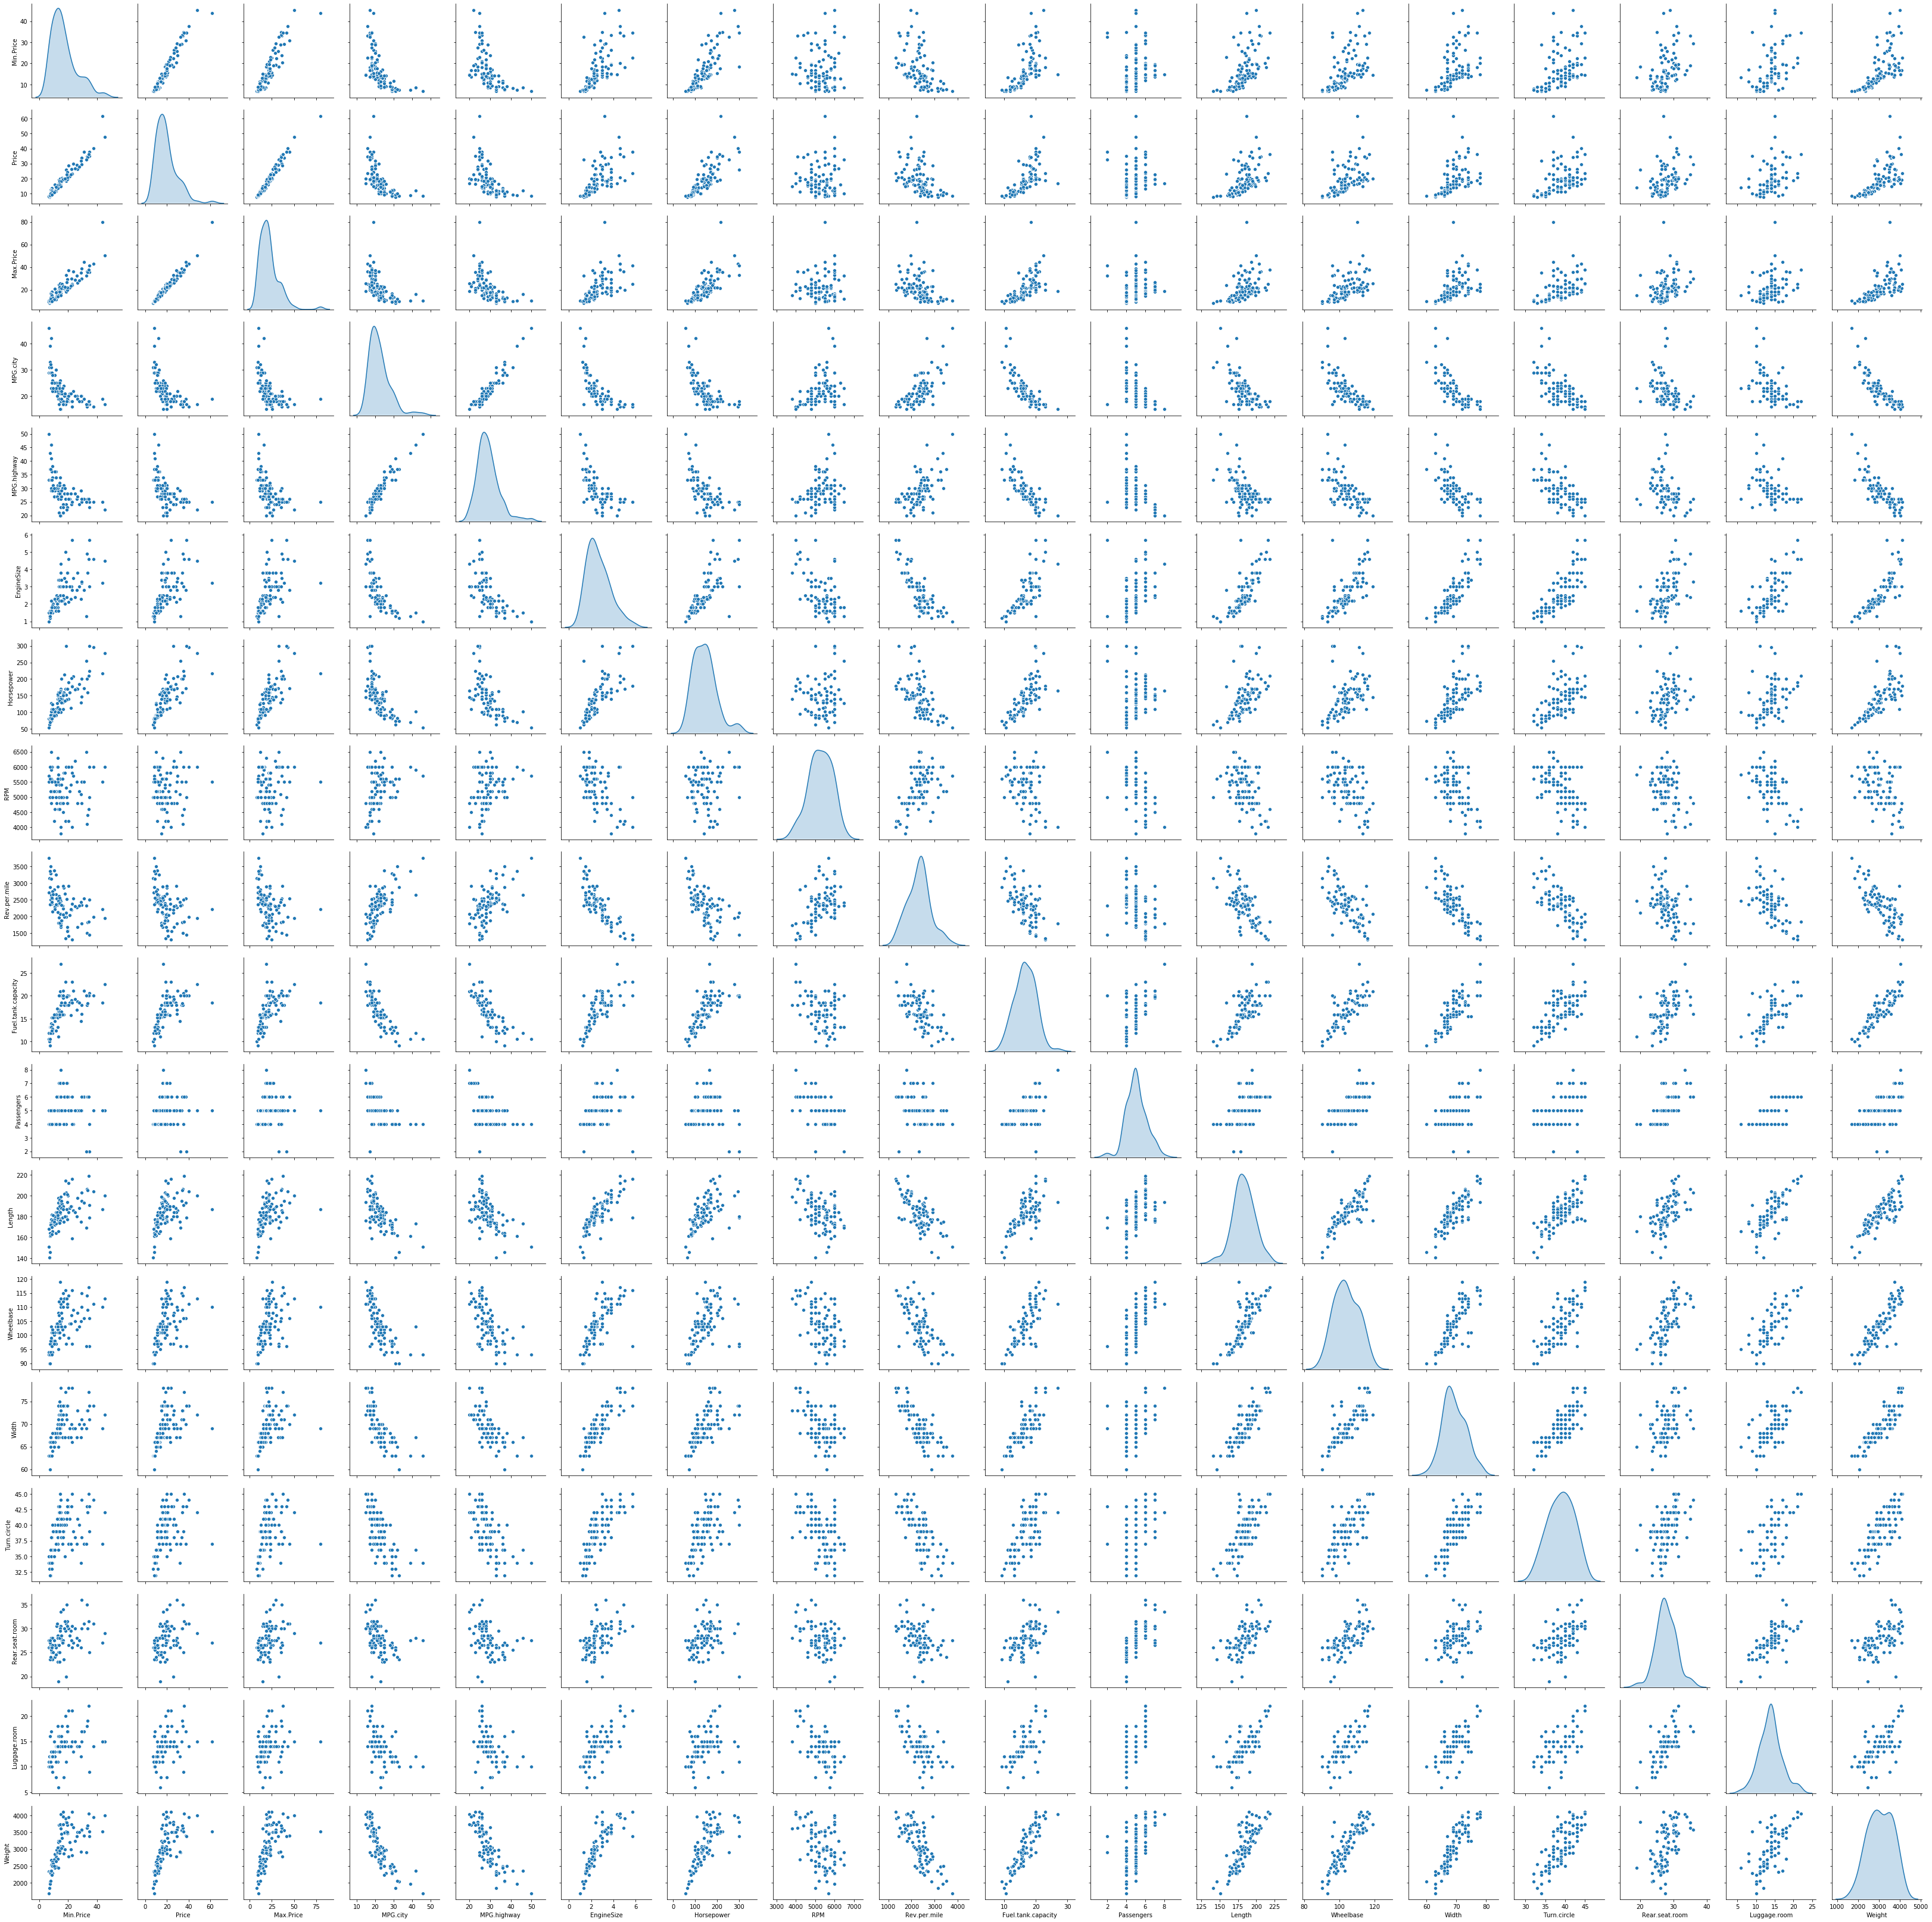

In [5]:
#sns.pairplot(df_carsales,diag_kind='kde')

#### Analysing continuous variables:

In [64]:
df_carsales.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


**Observation:**

From the above correlation,we can see very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.

#### Analysing catagorical variables:

In [65]:
#checking whether 'Type' is significant wrt Price

In [66]:
df_carsales.groupby('Type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Compact,16.0,18.212500,6.686890,11.1,13.375,16.15,20.675,31.9
Large,11.0,24.300000,6.337507,18.4,20.000,20.90,26.950,36.1
Midsize,22.0,27.218182,12.264841,13.9,16.775,26.20,34.200,61.9
Small,21.0,10.166667,1.953288,7.4,8.600,10.00,11.300,15.9
Sporty,14.0,19.392857,7.974716,10.0,14.175,16.80,22.425,38.0
Van,9.0,19.100000,1.878164,16.3,19.000,19.10,19.700,22.7


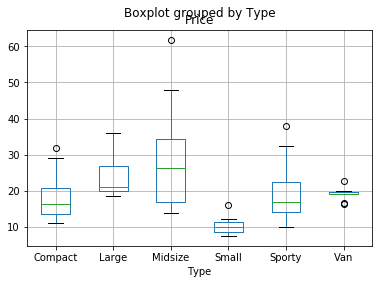

In [67]:
#Visualizing the data
df_carsales.boxplot(column='Price',by='Type')

In [68]:
#checking whether 'AirBags' is significant

In [69]:
df_carsales.groupby('AirBags').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
AirBags,,,,,,,,
Driver & Passenger,16.0,28.368750,12.545422,15.1,18.225,25.55,35.425,61.9
Driver only,43.0,21.223256,8.237395,9.8,15.650,19.90,26.200,47.9
None,34.0,13.173529,4.356556,7.4,9.400,11.90,16.200,23.3


In [70]:
#checking whether 'DriveTrain' is significant

In [71]:
df_carsales.groupby('DriveTrain').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
DriveTrain,,,,,,,,
4WD,10.0,17.630000,5.240028,8.4,14.950,19.05,19.800,25.8
Front,67.0,17.535821,7.838110,7.4,11.350,15.90,20.450,40.1
Rear,16.0,28.950000,13.063537,14.9,18.525,26.85,35.425,61.9


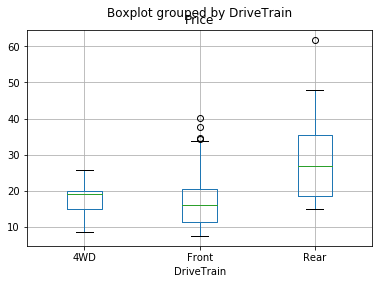

In [72]:
#Visualizing the data
df_carsales.boxplot(column='Price',by='DriveTrain')

In [73]:
#checking whether 'Cylinders' is having significance

In [74]:
df_carsales.groupby('Cylinders').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Cylinders,,,,,,,,
3,3.0,8.466667,0.115470,8.4,8.40,8.4,8.50,8.6
4,49.0,14.648980,5.472892,7.4,11.10,13.5,16.30,31.9
5,2.0,23.200000,4.949747,19.7,21.45,23.2,24.95,26.7
6,31.0,24.380645,9.285200,14.9,19.05,20.8,27.15,61.9
8,7.0,33.785714,10.437501,18.8,27.80,36.1,39.05,47.9
rotary,1.0,32.500000,NaN,32.5,32.50,32.5,32.50,32.5


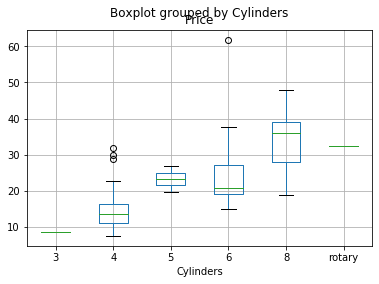

In [75]:
df_carsales.boxplot(column='Price',by='Cylinders')

In [76]:
df_carsales['Cylinders'].value_counts()

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [77]:
g1=df_carsales[df_carsales['Cylinders']=='4']['Price']
g2=df_carsales[df_carsales['Cylinders']=='6']['Price']
g3=df_carsales[df_carsales['Cylinders']=='8']['Price']
g4=df_carsales[df_carsales['Cylinders']=='3']['Price']
g5=df_carsales[df_carsales['Cylinders']=='5']['Price']
g6=df_carsales[df_carsales['Cylinders']=='rotary']['Price']

In [78]:
from scipy.stats import f_oneway
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=14.36328753683352, pvalue=3.042776105990462e-10)

In [79]:
#checking whether 'Passengers' is significant

In [80]:
df_carsales.groupby('Passengers').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Passengers,,,,,,,,
2,2.0,35.250000,3.889087,32.5,33.875,35.25,36.625,38.0
4,23.0,15.434783,7.405625,7.4,9.050,14.10,18.050,35.2
5,41.0,19.546341,11.353724,8.0,11.300,15.90,26.100,61.9
6,18.0,23.088889,7.927086,13.3,16.525,20.75,28.225,37.7
7,8.0,19.412500,1.739817,16.3,19.075,19.30,19.750,22.7
8,1.0,16.600000,NaN,16.6,16.600,16.60,16.600,16.6


In [81]:
#checking whether 'Origin' is significant

In [82]:
df_carsales.groupby('Origin').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Origin,,,,,,,,
USA,48.0,18.572917,7.816914,7.4,13.475,16.3,20.725,40.1
non-USA,45.0,20.508889,11.306752,8.0,11.600,19.1,26.700,61.9


In [83]:
df_carsales.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

# Model Fitting:

In [84]:
dfinal=df_carsales[[ 'Price', 'MPG.city', 'MPG.highway', 'AirBags', 'Cylinders',
   'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
   'Fuel.tank.capacity', 'Length', 'Wheelbase','Turn.circle', 'Weight']]
dfinal.shape

(93, 15)

In [85]:
#creating dummies

In [86]:
cols=['AirBags','Cylinders']
dfinal=pd.get_dummies(data=dfinal,columns=cols)

In [87]:
dfinal.head()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Length,Wheelbase,Turn.circle,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
1,15.9,25,31,1.8,140,6300,2890,Yes,13.2,177,102,37,2705,0,0,1,0,1,0,0,0,0
2,33.9,18,25,3.2,200,5500,2335,Yes,18.0,195,115,38,3560,1,0,0,0,0,0,1,0,0
3,29.1,20,26,2.8,172,5500,2280,Yes,16.9,180,102,37,3375,0,1,0,0,0,0,1,0,0
4,37.7,19,26,2.8,172,5500,2535,Yes,21.1,193,106,37,3405,1,0,0,0,0,0,1,0,0
5,30.0,22,30,3.5,208,5700,2545,Yes,21.1,186,109,39,3640,0,1,0,0,1,0,0,0,0


In [88]:
#changing to numeric
dfinal['Man.trans.avail'].replace({'Yes' :1,'No':0},inplace=True)

In [89]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 22 columns):
Price                         93 non-null float64
MPG.city                      93 non-null int64
MPG.highway                   93 non-null int64
EngineSize                    93 non-null float64
Horsepower                    93 non-null int64
RPM                           93 non-null int64
Rev.per.mile                  93 non-null int64
Man.trans.avail               93 non-null int64
Fuel.tank.capacity            93 non-null float64
Length                        93 non-null int64
Wheelbase                     93 non-null int64
Turn.circle                   93 non-null int64
Weight                        93 non-null int64
AirBags_Driver & Passenger    93 non-null uint8
AirBags_Driver only           93 non-null uint8
AirBags_None                  93 non-null uint8
Cylinders_3                   93 non-null uint8
Cylinders_4                   93 non-null uint8
Cylinders_5                

In [90]:
x=dfinal.drop(columns='Price')
y=dfinal.Price

In [91]:
LR = LinearRegression()
knn = KNeighborsRegressor() 
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
bag = BaggingRegressor(n_estimators=10)
adaboost = AdaBoostRegressor(n_estimators=50)
adaboost_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=50)
grad = GradientBoostingRegressor(n_estimators=100)

models = []
models.append(('Linear Regression',LR))
models.append(('KNN_new',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))

Linear Regression: 6.073858 (2.201493)
KNN_new: 6.718924 (2.484547)
Decision Tree: 7.992758 (2.971660)
Random Forrest: 6.257908 (2.378142)
Bagged DT: 6.537486 (2.349683)
Ada Boost DT: 6.022462 (2.343184)
Ada boost Random Forrest: 6.053209 (2.699846)
Gradient boosting: 6.089385 (2.700615)


# Taking polynomial features:

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [94]:
#degree 2

In [95]:
x=dfinal[['MPG.city','MPG.highway']]
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)
df_wt=pd.DataFrame(x_quad)

In [96]:
df_wt.head()

,0,1,2,3,4,5
0,1.0,25.0,31.0,625.0,775.0,961.0
1,1.0,18.0,25.0,324.0,450.0,625.0
2,1.0,20.0,26.0,400.0,520.0,676.0
3,1.0,19.0,26.0,361.0,494.0,676.0
4,1.0,22.0,30.0,484.0,660.0,900.0


In [97]:
k=pd.concat((dfinal.reset_index(),df_wt),axis=1)
k.head()

,index,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Length,Wheelbase,Turn.circle,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,0,1,2,3,4,5
0,1,15.9,25,31,1.8,140,6300,2890,1,13.2,177,102,37,2705,0,0,1,0,1,0,0,0,0,1.0,25.0,31.0,625.0,775.0,961.0
1,2,33.9,18,25,3.2,200,5500,2335,1,18.0,195,115,38,3560,1,0,0,0,0,0,1,0,0,1.0,18.0,25.0,324.0,450.0,625.0
2,3,29.1,20,26,2.8,172,5500,2280,1,16.9,180,102,37,3375,0,1,0,0,0,0,1,0,0,1.0,20.0,26.0,400.0,520.0,676.0
3,4,37.7,19,26,2.8,172,5500,2535,1,21.1,193,106,37,3405,1,0,0,0,0,0,1,0,0,1.0,19.0,26.0,361.0,494.0,676.0
4,5,30.0,22,30,3.5,208,5700,2545,1,21.1,186,109,39,3640,0,1,0,0,1,0,0,0,0,1.0,22.0,30.0,484.0,660.0,900.0


In [98]:
x=k.drop(columns=['Price',0,1,2])
y=k.Price

In [99]:
LR = LinearRegression()
knn = KNeighborsRegressor() 
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
bag = BaggingRegressor(n_estimators=10)
adaboost = AdaBoostRegressor(n_estimators=50)
adaboost_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=50)
grad = GradientBoostingRegressor(n_estimators=100)

models = []
models.append(('Linear Regression',LR))
models.append(('KNN_new',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))

Linear Regression: 6.249100 (2.307840)
KNN_new: 6.804735 (2.300573)
Decision Tree: 6.973785 (2.881609)
Random Forrest: 5.747498 (1.937103)
Bagged DT: 6.366067 (2.310765)
Ada Boost DT: 5.756236 (2.001355)
Ada boost Random Forrest: 6.002072 (2.429045)
Gradient boosting: 6.372978 (2.369498)


# Applying pca for better scores:

In [100]:
X=dfinal.drop(columns='Price')
y=dfinal.Price

In [101]:
#standarize
from scipy.stats import zscore
x_std=X.apply(zscore)

In [102]:
x_std.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Length,Wheelbase,Turn.circle,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
1,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,0.724286,-1.062184,-0.427186,-0.286932,-0.610436,-0.627055,-0.455842,-0.927362,1.317306,-0.182574,0.947607,-0.14825,-0.707107,-0.285299,-0.104257
2,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.724286,0.409445,0.812171,1.629649,-0.298510,0.830208,2.193741,-0.927362,-0.759125,-0.182574,-1.055290,-0.14825,1.414214,-0.285299,-0.104257
3,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.724286,0.072197,-0.220626,-0.286932,-0.610436,0.514894,-0.455842,1.078328,-0.759125,-0.182574,-1.055290,-0.14825,1.414214,-0.285299,-0.104257
4,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,0.724286,1.359872,0.674465,0.302785,-0.610436,0.566026,2.193741,-0.927362,-0.759125,-0.182574,-1.055290,-0.14825,1.414214,-0.285299,-0.104257
5,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,0.724286,1.359872,0.192493,0.745073,0.013416,0.966560,-0.455842,1.078328,-0.759125,-0.182574,0.947607,-0.14825,-0.707107,-0.285299,-0.104257


In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95,svd_solver = 'full')
principalComponents = pca.fit_transform(x_std)
xpca = pd.DataFrame(data = principalComponents)

In [104]:
xpca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.747950,0.440662,0.726224,-0.520328,0.593331,0.409854,-1.061588,-0.448642,-1.052171,0.101704,0.228794
1,-2.346492,1.673136,1.591523,0.294214,0.168561,-1.739726,-0.228006,-0.373835,0.098321,-0.784523,0.618797
2,-0.741959,-0.418733,0.895740,0.205703,-1.517778,-0.327258,0.660523,-1.450920,0.304186,0.282775,0.093816
3,-1.587873,1.682554,1.774535,0.228696,0.015518,-1.602999,-0.161446,-0.464618,0.316618,-0.966513,0.386034
4,-0.832115,-1.646209,0.874626,-0.045575,0.451148,-0.050867,0.256712,-0.849120,-1.058459,-0.939997,1.134154


In [105]:
LR = LinearRegression()
knn = KNeighborsRegressor() 
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
bag = BaggingRegressor(n_estimators=10)
adaboost = AdaBoostRegressor(n_estimators=50)
adaboost_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=50)
grad = GradientBoostingRegressor(n_estimators=100)

models = []
models.append(('Linear Regression',LR))
models.append(('KNN_new',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=7,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,xpca,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))

Linear Regression: 9.518733 (8.773005)
KNN_new: 6.317799 (2.725334)
Decision Tree: 9.101727 (3.953065)
Random Forrest: 6.178541 (2.748993)
Bagged DT: 6.501941 (3.119553)
Ada Boost DT: 5.873465 (2.994239)
Ada boost Random Forrest: 5.858655 (2.771506)
Gradient boosting: 6.421157 (3.240186)


In [108]:
#trade off-between the 2 best models - Ada Boost DT,Ada boost Random Forrest
#bias
(5.873465-5.858655)/5.873465

0.002521509875346266

In [109]:
#variance
(2.994239-2.771506)/2.994239

0.0743871815175742

The best model is Ada Boost Random Forest.